# Numerical errors and the parameter `h` in homework 04 / exercise 03

When discussing homework 04 / exercise 03, the question popped up why the numerical error increases if h gets smaller. Let's have a look!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [ ]:
def squared(x):
    return x ** 2

This is our solution for the exercise:

In [ ]:
def derivative(x, h, f):
    df = (f(x + h) - f(x - h)) / (2 * h)
    return df


def squared_prime(x):
    return 2 * x

In [4]:
x = 4

h = 0.01
print("h =", h, " numerical derivative: ", derivative(x, h, squared), " symbolic derivative: ", squared_prime(x))

h = 0.05
print("h =", h, " numerical derivative: ", derivative(x, h, squared), "  symbolic derivative: ", squared_prime(x))

h = 0.1
print("h =", h, "  numerical derivative: ", derivative(x, h, squared), "  symbolic derivative: ", squared_prime(x))

h = 0.01  numerical derivative:  7.9999999999998295  symbolic derivative:  8
h = 0.05  numerical derivative:  7.999999999999989   symbolic derivative:  8
h = 0.1   numerical derivative:  7.999999999999998   symbolic derivative:  8


Let's make a plot of the error for different values of `h`:

<AxesSubplot:xlabel='h'>

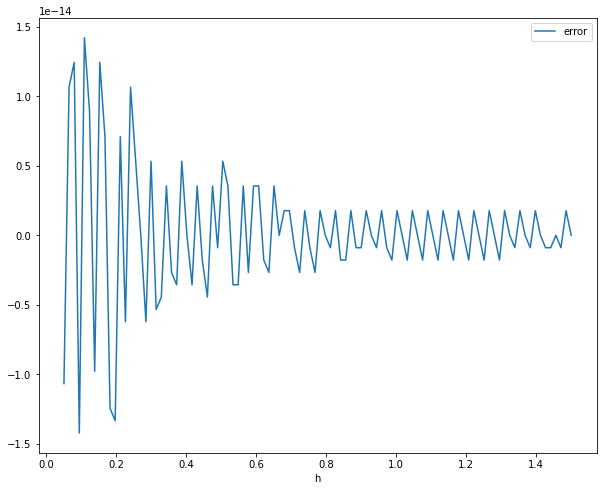

In [5]:
x = 4
h = np.linspace(0.05, 1.5, num=100)

df = pd.DataFrame({
    "h": h,
    "result": derivative(x, h, squared),
    "error": derivative(x, h, squared) - 2 * x,
})

df.plot(x='h', y='error')

Oh wow! Indeed, the error gets small if `h` gets larger. This is exactly the oppisite of what we expected.

Even if `h` is larger than `x` we get a small error:

In [6]:
x = 2
h = 2.5
derivative(x, h, squared) - squared_prime(x)

0.0

What is happening here?

Let's plug in $f(x) = x^2$ in the formula for the derivative:

$$
    \frac{f(x + h) -f(x - h)}{2 h} = \frac{(x + h)^2 - (x - h)^2}{2h} = \frac{x^2 + 2xh + h^2 - x^2 + 2xh - h^2}{2h} = 2x
$$

That means that for $x^2$ the result is actually independent of $h$.

In other words, we can draw the symmetrical triangle arounda  point on the curve and the slope will always be the same independent of the size of the triangle:

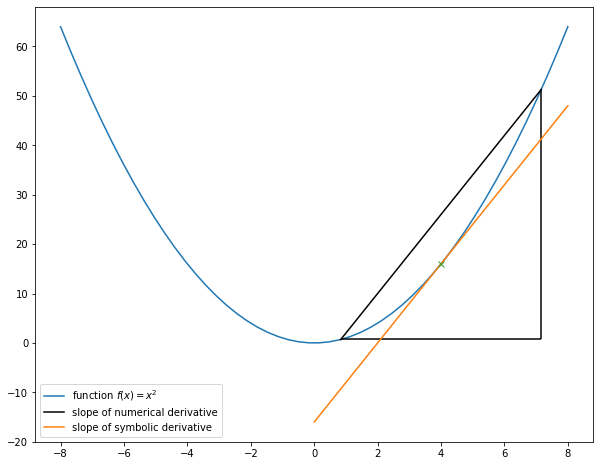

In [76]:
x = 4
h = 10
xx = np.linspace(-8, 8)

plt.plot(xx, xx ** 2, label='function $f(x) = x^2$')


x_h = [(-2 * x + sign * np.sqrt(4*x**2 - 4 * (x**2 - h)))/ -2 for sign in (1, -1)]
xx = np.array(x_h)
plt.plot(xx, 2 * x * xx - x**2 + h, color='k', label='slope of numerical derivative')
plt.hlines(x_h[0]**2, *x_h, color='k')
plt.vlines(x_h[1], *xx**2, color='k')


xx = np.linspace(x - 4, x + 4)
plt.plot(xx, 2 * x * xx - x ** 2, label='slope of symbolic derivative')

plt.plot(x, x ** 2, 'x')

plt.legend();

So why does the error increase with smaller $h$? Well, this is due to a phenomenon called *catastrophic cancellation*: even if the result should be the same symbolically, we get a different result because with small $h$ we subtract two values which are close to each other which causes a loss of precision.

In [ ]:
def plot_error(f, f_prime):
    x = 4
    h = np.linspace(0.05, 1.5, num=100)

    df = pd.DataFrame({
        "h": h,
        "result": derivative(x, h, f),
        "error": derivative(x, h, f) - f_prime(x),
    })

    df.plot(x='h', y='error')

Does this happen for every function?

No! Look at $f(x) = x^3$:

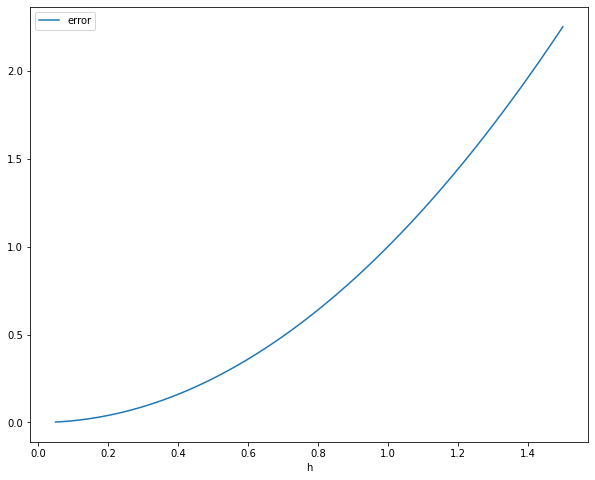

In [79]:
plot_error(lambda x: x**3, lambda x: 3*x**2)

Are there other functions where this is happening?

Yes! Look at $f(x) = 2x$:

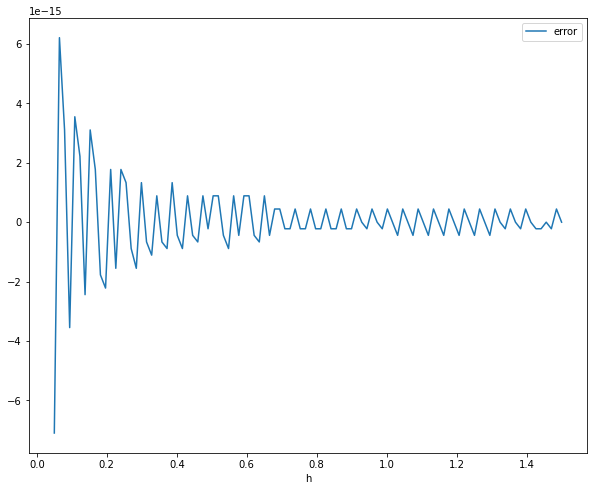

In [80]:
plot_error(lambda x: 2*x, lambda x: 2)

Actually, all functions which satisfy this property are of the form $f(x) = c_3 x^2 + c_2 x + c_1$ for some arbitrary constants $c_1$, $c_2$ and $c_3$. So we were pretty unlucky to pick such a misleading example!

To prove this statement, we need a bit more advanced math:

(This is just a sketch of a proof. Honestly, I didn't think this through until the last detail, but I hope the statement is correct.)

Let's assume we have any arbitrary function $f$ which is infinitely differentiable.

Look at the Taylor expansion of $f(x+h)$ around $x$.

$$
    f(x + h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{3!}f'''(x) + \cdots\\
    f(x - h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{3!}f'''(x) + \cdots
$$

Subtracting the two equations above yields:

$$
    f'(x) = \frac{f(x+h) - f(x-h)}{2h} - \frac{h^2}{3}f'''(x) + \cdots
$$

The right hand side of the equation vanishes if $f'''(x)$ and higher derivatives are zero. The sum $\frac{h^2}{3}f'''(x) + \cdots$ is not zero if some summands are not zero.